### Implementing State Vector Simulation using matrix multiplication (dot product)

In [1]:
import numpy as np
# Identity gate (I)
I = np.array([
    [1, 0],
    [0, 1]
])
# Pauli-X gate (X)
X = np.array([
    [0, 1],
    [1, 0]
])
# Hadamard gate (H)
H = (1 / np.sqrt(2)) * np.array([
    [1,  1],
    [1, -1]
])
# CNOT gate matrix
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

In [2]:
# number of qubits = n
def apply_on_n_qubits(n):
    X_n = X
    H_n = H
    CX_n = CX
    for i in range(1,n):
        X_n = np.kron(X_n, X)
        H_n = np.kron(H_n, H)

    for i in range(1,int(n/2)):
        CX_n = np.kron(CX_n, CX)
    if(n%2):
        CX_n = np.kron(CX_n, I)
    # state of qubit
    state = np.zeros(2**n)
    state[0] = 1 # initial state = 000...
    # applying all gates on all qubits 
    state = X_n @ state
    state = H_n @ state
    state = CX_n @ state
    return state

In [3]:
import time
time_taken = []
state_n = []
N = 15

for n in range(2, N):
    start = time.time()
    # state_n.append(apply_on_n_qubits(n))
    apply_on_n_qubits(n)
    time_taken.append(time.time() - start)
    print(n)

2
3
4
5
6
7
8
9
10
11
12
13


MemoryError: Unable to allocate 2.00 GiB for an array with shape (8192, 2, 8192, 2) and data type float64

In [4]:
# time_taken = np.array(time_taken)
n_values = [i for i in range(2,(len(time_taken))+2)]
print(time_taken)

[0.0010039806365966797, 0.0, 0.0, 0.0009987354278564453, 0.0, 0.0009970664978027344, 0.0039997100830078125, 0.015002965927124023, 0.04477882385253906, 0.18810343742370605, 0.7363779544830322, 4.115805625915527]


In [5]:
# state_n

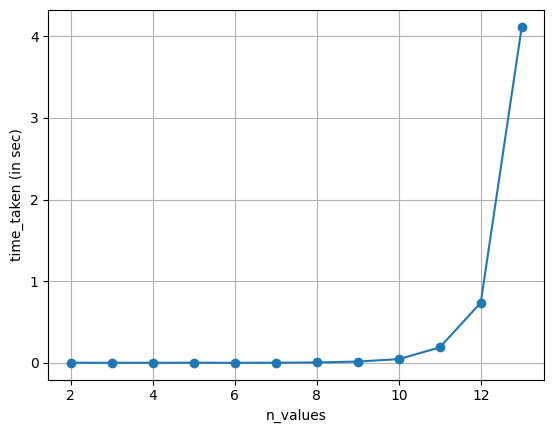

In [6]:
import matplotlib.pyplot as plt
plt.plot(n_values, time_taken, marker='o')
plt.xlabel("n_values")
plt.ylabel("time_taken (in sec)")
plt.grid(True)
plt.show()